In [1]:
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [2]:
f"{getcwd()}/Dataset Medicinal"

'C:\\Users\\ASUS\\Documents\\Lectures\\BANGKIT\\ml-bangjek\\The GIT\\leafwell-ml/Dataset Medicinal'

In [3]:
#path_medicinal_leaf_data = f"{getcwd()}/Dataset Medicinal/dataset_medicinal_leaf.zip"
path_medicinal_leaf_data = f"{getcwd()}/Dataset Medicinal/leaf_dataset.zip"

local_zip = path_medicinal_leaf_data
zip_ref = zipfile.ZipFile(local_zip, 'r')
shutil.rmtree('/tmp')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
#os.listdir('/tmp/Segmented Medicinal Leaf Images')
os.listdir('/tmp/Segmented Medicinal Leaf Images')

['Amaranthus Viridis (Arive-Dantu)',
 'Basella Alba (Basale)',
 'Ficus Auriculata (Roxburgh fig)',
 'Moringa Oleifera (Drumstick)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Psidium Guajava (Guava)']

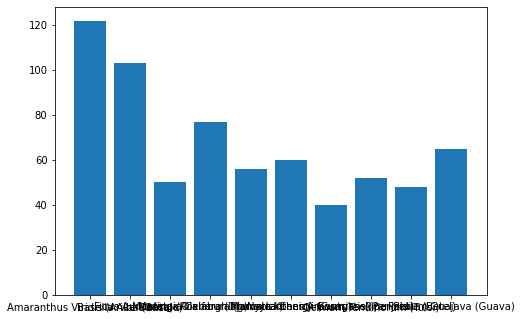

In [5]:
langs = []
qty = []

for x in os.listdir('/tmp/Segmented Medicinal Leaf Images'):
    langs.append(x)
    qty.append(len(os.listdir('/tmp/Segmented Medicinal Leaf Images/'+ x)))
    
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = langs
qty = qty
ax.bar(langs,qty)
plt.show()

In [6]:
os.mkdir('/tmp/medicinal-leaf')
os.mkdir('/tmp/medicinal-leaf/training')
os.mkdir('/tmp/medicinal-leaf/testing')
    
for x in os.listdir('/tmp/Segmented Medicinal Leaf Images'):
    os.mkdir('/tmp/medicinal-leaf/training/' + x)
    os.mkdir('/tmp/medicinal-leaf/testing/' + x)

In [7]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = list()
    for fname in os.listdir(SOURCE):
        f = SOURCE + fname
        if os.path.getsize(f) > 0:
            files.append(fname)

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled = random.sample(files, len(files))
    training_set = shuffled[0:training_length]
    testing_set = shuffled[:testing_length]

    for fname in training_set:
        tfile = SOURCE + fname
        destin = TRAINING + fname
        copyfile(tfile, destin)
        
    for fname in testing_set:
        tfile = SOURCE + fname
        destin = TESTING + fname
        copyfile(tfile, destin)

split_size = .9

for x in os.listdir('/tmp/Segmented Medicinal Leaf Images'):
    split_data('/tmp/Segmented Medicinal Leaf Images/'+ x + '/', '/tmp/medicinal-leaf/training/' + x + '/', '/tmp/medicinal-leaf/testing/' + x + '/', split_size)

In [8]:
for x in os.listdir('/tmp/Segmented Medicinal Leaf Images'):
    print('name:', x)
    print('train:', len(os.listdir('/tmp/medicinal-leaf/training/'+ x + '/')))
    print('test', len(os.listdir('/tmp/medicinal-leaf/testing/'+ x + '/')))
    print('---------------------------------------------------------')

name: Amaranthus Viridis (Arive-Dantu)
train: 109
test 13
---------------------------------------------------------
name: Basella Alba (Basale)
train: 92
test 11
---------------------------------------------------------
name: Ficus Auriculata (Roxburgh fig)
train: 45
test 5
---------------------------------------------------------
name: Moringa Oleifera (Drumstick)
train: 69
test 8
---------------------------------------------------------
name: Muntingia Calabura (Jamaica Cherry-Gasagase)
train: 50
test 6
---------------------------------------------------------
name: Murraya Koenigii (Curry)
train: 54
test 6
---------------------------------------------------------
name: Nyctanthes Arbor-tristis (Parijata)
train: 36
test 4
---------------------------------------------------------
name: Ocimum Tenuiflorum (Tulsi)
train: 46
test 6
---------------------------------------------------------
name: Piper Betle (Betel)
train: 43
test 5
---------------------------------------------------------

In [28]:
# DEFINE A KERAS MODEL TO CLASSIFY
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units= 512, activation='relu'),
    tf.keras.layers.Dense(units= 10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 18496)            

In [10]:
TRAINING_DIR = '/tmp/medicinal-leaf/training'
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size = 10,
    target_size = (150,150),
    class_mode = 'categorical' 
)

VALIDATION_DIR = '/tmp/medicinal-leaf/testing'
validation_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size = 10,
    target_size = (150,150),
    class_mode = 'categorical' 
)

Found 602 images belonging to 10 classes.
Found 71 images belonging to 10 classes.


In [43]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/tmp/checkpoint',
    monitor='val_acc',
    mode='max',
    save_best_only=True)

history = model.fit_generator(
    train_generator,
    steps_per_epoch= 602 // 10,
    epochs= 5,
    validation_data=validation_generator,
    validation_steps= 71 // 10,
    callbacks= [callback])

Epoch 1/5
60/60 [==============================] - 22s 370ms/step - loss: 0.1402 - acc: 0.9544 - val_loss: 0.2292 - val_acc: 0.9286
Epoch 2/5
60/60 [==============================] - 22s 372ms/step - loss: 0.1393 - acc: 0.9527 - val_loss: 0.1738 - val_acc: 0.9429
Epoch 3/5
60/60 [==============================] - 23s 377ms/step - loss: 0.1170 - acc: 0.9517 - val_loss: 0.1272 - val_acc: 0.9571
Epoch 4/5
60/60 [==============================] - 22s 367ms/step - loss: 0.2005 - acc: 0.9452 - val_loss: 0.1120 - val_acc: 0.9571
Epoch 5/5
60/60 [==============================] - 22s 371ms/step - loss: 0.1028 - acc: 0.9650 - val_loss: 0.0571 - val_acc: 0.9857


In [44]:
model.save('model_3june21')

Text(0.5, 1.0, 'Training and validation loss')

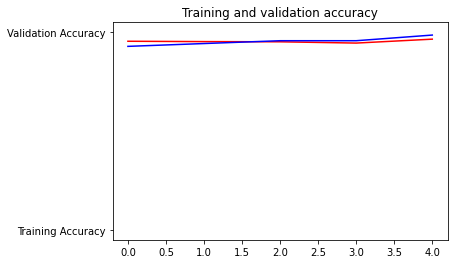

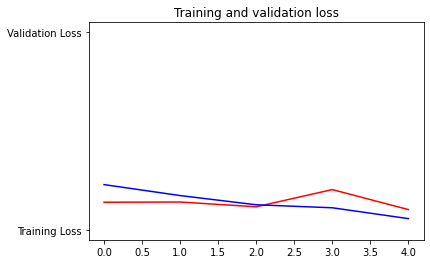

In [45]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)